In [126]:
import numpy as np
from scipy.linalg import expm
from ncon import ncon

sx = np.zeros([2, 2])
sz = np.zeros([2, 2])
sx[0,1] = sx[1,0] = 1
sz[0,0] = 1; sz[1,1] = -1

def prod(a):
    import operator
    from functools import reduce
    return reduce(operator.mul, a, 1)

def eijk(args):
    from math import factorial
    n = len(args)
    return prod(prod(args[j] - args[i] for j in range(i + 1, n)) / factorial(i) for i in range(n))

def zbar():
    z = np.zeros([3, 3])
    z[0, 0] = z[1, 1] = 1
    z[2, 2,] = -1
    return z

def rvb():
    P = np.zeros([2, 3, 3])
    P[0, 0, 2] = P[0, 2, 0] = P[1, 1, 2] = P[1, 2, 1] = 1.
    epsilon = np.zeros([3, 3, 3])
    for i in range(3):
        for j in range(3):
            for k in range(3):
                epsilon[i, j, k] = eijk((i,j,k))
#                 epsilon[i, j, k] = eijk((i,j,k))*2**(-1/2)
    epsilon[2, 2, 2] = 1
    return P, epsilon

def AKLTsquare():
    bond = np.zeros([2, 2])
    bond[0, 1] = 2**(-1/2); bond[1, 0] = -2**(-1/2)
    P = np.zeros([5, 2, 2, 2, 2])
    for i in range(2):
        for j in range(2):
            for k in range(2):
                for l in range(2):
                    if i+j+k+l == 0:
                        P[0 ,i, j, k, l] = 1
                    elif i+j+k+l == 1:
                        P[1 ,i, j, k, l] = 4**(-1/2)
                    elif i+j+k+l == 2: 
                        P[2 ,i, j, k, l] = 6**(-1/2)
                    elif i+j+k+l == 3:  
                        P[3 ,i, j, k, l] = 4**(-1/2)  
                    elif i+j+k+l == 4:   
                        P[4 ,i, j, k, l] = 1        
    print(P)
    print("============================================================")
    print(ncon([P, sz, sz, sz, sz], [[-1, 1, 2, 3, 4],[1, -2], [2, -3], [3, -4], [4, -5]]))
    aklt = ncon([P, bond, bond, bond, bond], [[-1, 1, 2, 3, 4],[1, -2], [2, -3], [3, -4], [4, -5]])
    return aklt


# aklt = AKLTsquare()


P, epsilon = rvb()
ePPP = ncon([epsilon, P, P, P], [[1, 2, 3], [-4,1,-1], [-5,2,-2], [-6,3,-3]]).reshape(3,3,3,8)
ePPPe = ncon([ePPP, epsilon], [[-1, -2, 1, -5], [1, -3, -4]])
num = [-1, 0, 1]
# z = np.zeros([3, 3])
for i in num:
    for j in num:
        for k in num:
            for l in num:
                for m in num:
                    z = np.zeros([3, 3])
#                     z[0, 0] = i; z[0, 1] = j; z[1, 0] = k; z[1, 1] = l; z[2, 2] = m
                    z[0, 2] = i; z[1, 2] = j; z[2, 1] = k; z[2, 0] = l; z[2, 2] = m
                    if np.linalg.norm(-P-ncon([P, z, z],[[-1, 2, 3],[2, -2], [3, -3]])) == 0:
                        print(z)                   
#                     z[0, 2] = i; z[1, 2] = j; z[2, 1] = k; z[2, 0] = l; z[2, 2] = m
#                     if np.linalg.norm((-ePPPe)-ncon([ePPPe, z, z, z, z],[[1,2,3,4,-5],[1, -1], [2, -2], [3, -3],[4, -4]])) == 0:
#                         print(z)
#                     if np.linalg.norm((ePPPe)-ncon([ePPPe, z, z, z, z],[[1,2,3,4,-5],[1, -1], [2, -2], [3, -3],[4, -4]])) == 0:
#                         print(z)
#                     if np.linalg.norm((-ePPPe)-ncon([ePPPe, z, z, z],[[1,2,3,-4,-5],[1, -1], [2, -2], [3, -3]])) == 0:
#                         print(z)
#                     if np.linalg.norm((ePPPe)-ncon([ePPPe, z, z, z],[[1,2,3,-4,-5],[1, -1], [2, -2], [3, -3]])) == 0:
#                         print(z)
#                     if np.linalg.norm((-ePPPe)-ncon([ePPPe, z, z],[[1,2,-3,-4,-5],[1, -1], [2, -2]])) == 0:
#                         print(z)
#                     if np.linalg.norm((ePPPe)-ncon([ePPPe, z, z],[[1,2,-3,-4,-5],[1, -1], [2, -2]])) == 0:
#                         print(z)
#                     if np.linalg.norm(-ePPPe-ncon([ePPPe, z],[[1,-2,-3,-4,-5],[1, -1]])) == 0:
#                         print(z)
#                     if np.linalg.norm(ePPPe-ncon([ePPPe, z],[[1,-2,-3,-4,-5],[1, -1]])) == 0:
#                         print(z)
                    

# z = zbar()
# print(P)
# print(np.transpose(P, (0,2,1)))
# print(ncon([epsilon, z, z, z], [[1, 2, 3], [1 ,-1], [2, -2], [3, -3]]))
# print(epsilon)
# print(ncon([P, z, z], [[-1, 2, 3], [2, -2], [3, -3]]))
# print(P)
# ePPP = ncon([epsilon, P, P, P], [[1, 2, 3], [-4,1,-1], [-5,2,-2], [-6,3,-3]]).reshape(3,3,3,8)
# ePPPe = ncon([ePPP, epsilon], [[-1, -2, 1, -5], [1, -3, -4]])
# W = ncon([ePPPe, ePPPe.conj()],[[-1,-3,-5,-7,1],[-2,-4,-6,-8,1]]).reshape(9, 9, 9, 9)
# print(ePPPe.shape)
# print(ncon([ePPPe, z, z, z, z], [[1,2,3,4,-5],[1,-1],[2,-2],[3,-3],[4,-4]]))
# print("=====================")
# print(ePPPe)

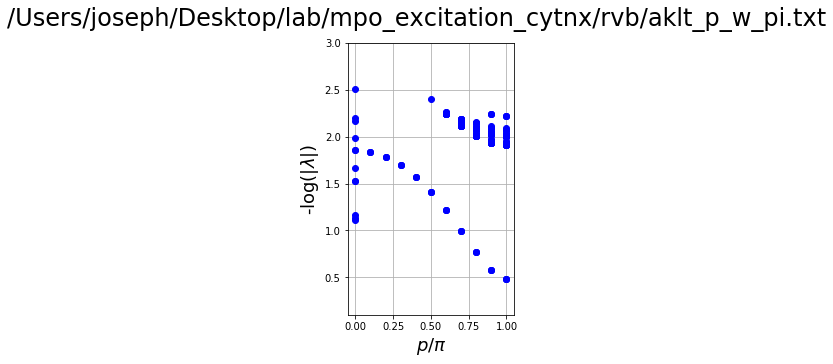

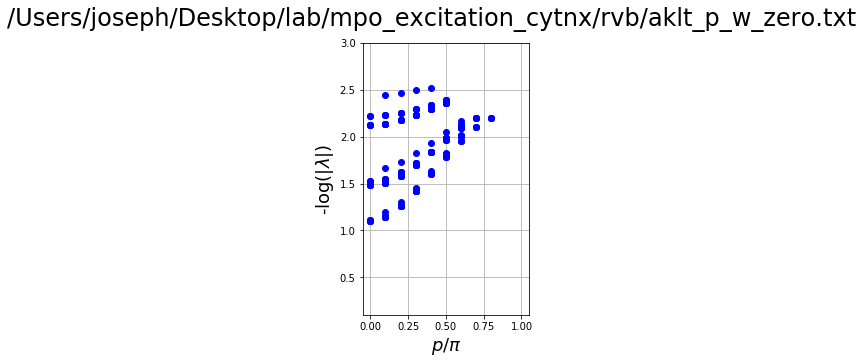

In [89]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['o','^']; 
clist = ["b","r"]
linewidth = 0
markersize = 6
num_p = 11
p1 = np.linspace(0, 1.0, 11)

filename = "/Users/joseph/Desktop/lab/mpo_excitation_cytnx/rvb/aklt_p_w_pi.txt"
data = np.loadtxt(filename)
w1 = data
lnw1 = np.log(abs(w1)) 
fig, ax1 = plt.subplots(figsize = (3,5))
fig.suptitle(filename, fontsize = 24)
ax1.plot(p1, -lnw1, c = clist[0], lw= linewidth, marker = makerlist[0], ms = markersize)
    
# ax1.set_xlim(0, 1.0)
ax1.set_ylim(0.1,3.0)

ax1.set_xlabel('$p$/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
# ax1.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.subplots_adjust(left = 0.18,right = 0.95)

ax1.grid()
# plt.savefig(filename+"_.pdf")
plt.show()


filename = "/Users/joseph/Desktop/lab/mpo_excitation_cytnx/rvb/aklt_p_w_zero.txt"
data = np.loadtxt(filename)
w1 = data
lnw1 = np.log(abs(w1)) 
fig, ax1 = plt.subplots(figsize = (3,5))
fig.suptitle(filename, fontsize = 24)
ax1.plot(p1, -lnw1, c = clist[0], lw= linewidth, marker = makerlist[0], ms = markersize)
    
# ax1.set_xlim(0, 1.0)
ax1.set_ylim(0.1,3.0)
ax1.set_xlabel('$p$/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
# ax1.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.subplots_adjust(left = 0.18,right = 0.95)

ax1.grid()
# plt.savefig(filename+"_.pdf")
plt.show()




//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log


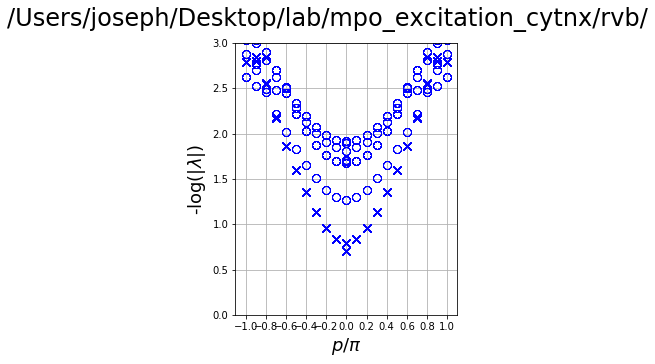

In [101]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['o','x']; 
clist = ["b","r"]
markersize = 8


# filename = "/Users/joseph/Desktop/lab/mpo_excitation_cytnx/rvb/rvb_p_w.txt"

# fig, ax1 = plt.subplots(figsize = (6,7))
# fig.suptitle(filename, fontsize = 24)


# p1 = np.linspace(0, 1.0, 11)
# data = np.loadtxt("/Users/joseph/Desktop/lab/mpo_excitation_cytnx/rvb/rvb_p_w_domain.txt")
# p1 = np.linspace(0, 1.0, 11)
# p1 = np.concatenate((-np.flip(p1), p1), axis=0)
# w1 = data
# w1 = np.concatenate((np.flip(w1), w1), axis=0)
# lnw1 = np.log(abs(w1))
# ax1.plot(p1,-lnw1, c = clist[1], lw= 0, marker = makerlist[1], ms = markersize)
    
# p1 = np.linspace(0, 1.0, 11)
# data = np.loadtxt("/Users/joseph/Desktop/lab/mpo_excitation_cytnx/rvb/rvb_p_w.txt")
# p1 = np.concatenate((-np.flip(p1), p1), axis=0)
# w1 = data
# w1 = np.concatenate((np.flip(w1), w1), axis=0)
# lnw1 = np.log(abs(w1)) 
# ax1.plot(p1,-lnw1, c = clist[0], lw= 0, marker = makerlist[0], ms = markersize)

p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)

filename = "/Users/joseph/Desktop/lab/mpo_excitation_cytnx/rvb/"

data_triv_Ceq = np.loadtxt(filename + "triv_Ceq.txt")
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
fig, ax1 = plt.subplots(figsize = (4,5))
fig.suptitle(filename, fontsize = 24)
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[0],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)
    
data_triv_Ceq = np.loadtxt(filename + "triv_Cdiff.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[1],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)


ax1.set_ylim(0,3.0)
ax1.set_xlabel('$p$/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
ax1.set_xticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2, 0.4, 0.6, 0.8, 1.0])
plt.subplots_adjust(left = 0.18,right = 0.95)
ax1.grid()
plt.show()

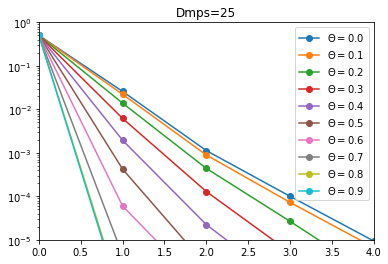

In [50]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['o','^']; 
clist = ["b","r"]
linewidth = 0
markersize = 6
xs = np.linspace(0, 1, 11)
xcr = np.load("/Users/joseph/Desktop/lab/mpo_excitation_cytnx/rvb/xcr.npy")
plt.title("Dmps=25")
for i in range(10):
#     print(xcr[i][1])
    plt.plot(np.abs(xcr[i]), marker = makerlist[0], label = "$ \Theta = %.1f$"%xs[i])
plt.yscale("log")
plt.xlim(0, 4)
plt.ylim(1e-5, 1e-0)
plt.legend()

x =  0.0
x =  0.1
x =  0.2
x =  0.30000000000000004
x =  0.4
x =  0.5
x =  0.6000000000000001
x =  0.7000000000000001
x =  0.8
x =  0.9
x =  1.0
x =  0.0
x =  0.1
x =  0.2
x =  0.30000000000000004
x =  0.4
x =  0.5
x =  0.6000000000000001
x =  0.7000000000000001
x =  0.8
x =  0.9
x =  1.0


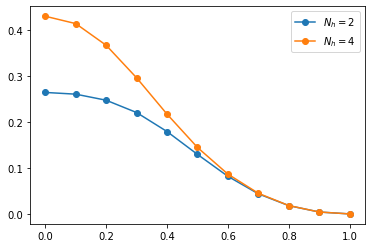

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from ncon import ncon
from scipy.linalg import eigvals

def rvbPx(x):
    
    def prod(a):
        import operator
        from functools import reduce
        return reduce(operator.mul, a, 1)

    def eijk(args):
        from math import factorial
        n = len(args)
        return prod(prod(args[j] - args[i] for j in range(i + 1, n)) / factorial(i) for i in range(n))

    Px = np.zeros([2, 2, 3, 3])
    Px[0, 0, 0, 2] = Px[0, 0, 2, 0] = Px[0, 1, 1, 2] = Px[0, 1, 2, 1] = 1.
    Px[1, 0, 0, 2] = Px[1, 1, 1, 2] = x
    Px[1, 0, 2, 0] = Px[1, 1, 2, 1] = -x
    epsilon = np.zeros([3, 3, 3])
    for i in range(3):
        for j in range(3):
            for k in range(3):
                epsilon[i, j, k] = eijk((i,j,k))
#                 epsilon[i, j, k] = eijk((i,j,k))*2**(-1/2)
    epsilon[2, 2, 2] = 1
    return Px.reshape(4, 3, 3), epsilon


######### gap of the transfer operator
xs = np.linspace(0, 1, 11)
gaps1 = []
for x in xs:
    print("x = ", x)
    P, epsilon = rvbPx(x)
    ePPP = ncon([epsilon, P, P, P], [[1, 2, 3], [-4,1,-1], [-5,2,-2], [-6,3,-3]]).reshape(3,3,3,64)
    ePPPe = ncon([ePPP, epsilon], [[-1, 1, -2, -5], [1, -4, -3]])
    W = ncon([ePPPe, ePPPe.conj()],[[-1,-3,-5,-7,1],[-2,-4,-6,-8,1]]).reshape(9, 9, 9, 9)
    W/=np.max(np.abs(W))
    Tsf = ncon([W, W],[[1,-1,2,-3],[2,-2,1,-4]]).reshape(9**2, 9**2)
    w = eigvals(Tsf)
    w = np.flip(np.sort(np.abs(w)))
    gaps1.append(w[2]/w[0])
plt.plot(xs, gaps1, marker = "o", label = "$N_h = 2$ ")

gaps2 = []
for x in xs:
    print("x = ", x)
    P, epsilon = rvbPx(x)
    ePPP = ncon([epsilon, P, P, P], [[1, 2, 3], [-4,1,-1], [-5,2,-2], [-6,3,-3]]).reshape(3,3,3,64)
    ePPPe = ncon([ePPP, epsilon], [[-1, 1, -2, -5], [1, -4, -3]])
    W = ncon([ePPPe, ePPPe.conj()],[[-1,-3,-5,-7,1],[-2,-4,-6,-8,1]]).reshape(9, 9, 9, 9)
    W/=np.max(np.abs(W))
    Tsf = ncon([W, W, W, W],[[1,-1,2,-5],[2,-2,3,-6],[3,-3,4,-7],[4,-4,1,-8]]).reshape(9**4, 9**4)
    w = eigvals(Tsf)
    w = np.flip(np.sort(np.abs(w)))
    gaps2.append(w[2]/w[0])
plt.plot(xs, gaps2, marker = "o", label = "$N_h = 4$ ")
plt.legend()
plt.show()

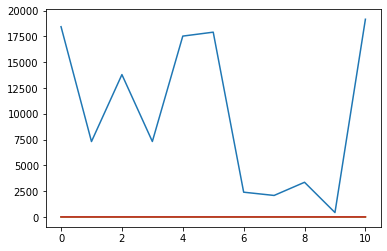

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from ncon import ncon
from scipy.linalg import eigvals

f = np.load("/Users/joseph/Desktop/lab/mpo_excitation_cytnx/rvb/fs.npy")
plt.plot(f[0])
plt.plot(f[1])
plt.plot(f[2])
plt.plot(f[3])

/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/point_e/bx0.6bz0.5Dmps6_triv_Ceq.txt
(11,)
(11, 4)


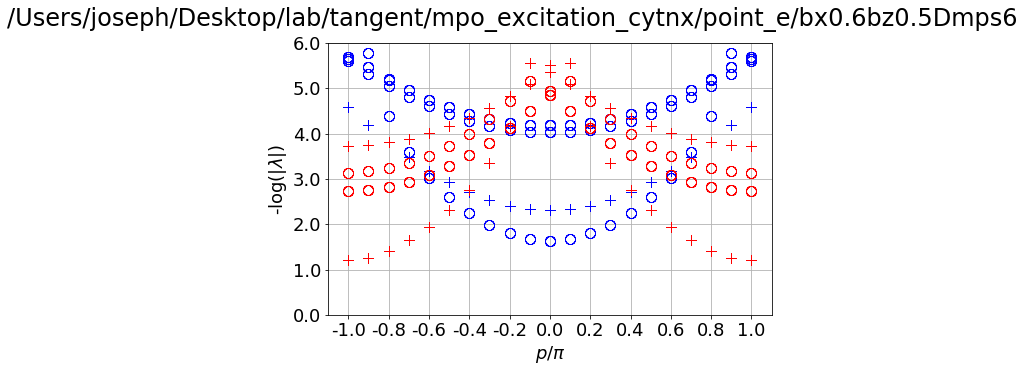

In [115]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['+','o']; 
clist = ["b","r"]
linewidth = 0
markersize = 10
num_p = 11

filename = "/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/point_e/bx0.6bz0.5Dmps6"


print(filename + "_triv_Ceq.txt")
data_triv_Ceq = np.loadtxt(filename + "_triv_Ceq.txt")

print(data_triv_Ceq.shape)

p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
fig, ax1 = plt.subplots(figsize = (8,5))
fig.suptitle(filename, fontsize = 24)
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[0],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)
    
data_triv_Ceq = np.loadtxt(filename + "_triv_Cdiff.txt")
print(data_triv_Ceq.shape)
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[1],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)


data_triv_Ceq = np.loadtxt(filename + "_domain_Ceq.txt")
p1 = 1.-np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[1],ls= '--', lw= linewidth,marker = makerlist[0],mec= clist[1], 
             mfc= 'none', mew = .5, ms = markersize)

data_triv_Ceq = np.loadtxt(filename + "_domain_Cdiff.txt")
p1 = 1.-np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[1],ls= '--', lw= linewidth,marker = makerlist[1],mec= clist[1], 
                  mfc= 'none', mew = .5, ms = markersize)
    
# ax.set_xlim(0,1)
ax1.set_ylim(0,6)
ax1.set_xlabel('$p$/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
# ax1.set_title("point_e" , fontdict={'size':18})
ax1.set_yticklabels(ax1.get_yticks(),fontdict={'size':18})
ax1.set_xticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_xticklabels(ax1.get_xticks(),fontdict={'size':18})

plt.subplots_adjust(left = 0.18,right = 0.95)

ax1.grid()
plt.savefig(filename+"_.pdf")
plt.show()




/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/point_e'/bx0.4bz0.8Dmps6_triv_Ceq.txt
(11, 2)


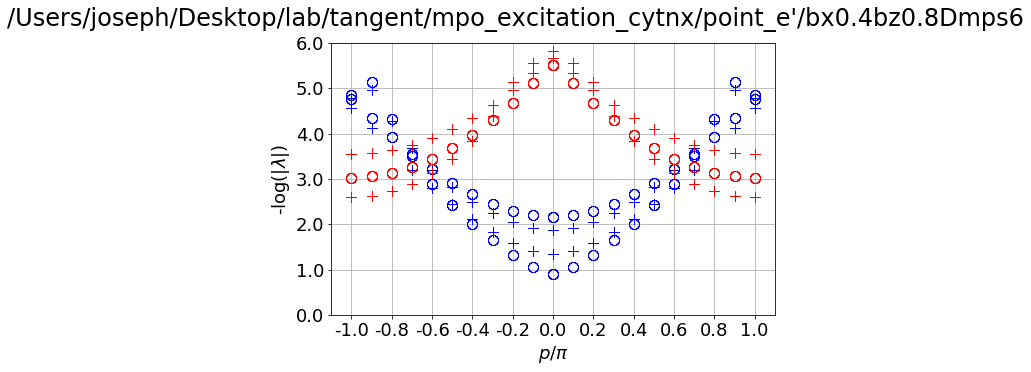

In [89]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['+','o']; 
clist = ["b","r"]
linewidth = 0
markersize = 10
num_p = 11

filename = "/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/point_e'/bx0.4bz0.8Dmps6"


print(filename + "_triv_Ceq.txt")
data_triv_Ceq = np.loadtxt(filename + "_triv_Ceq.txt")

print(data_triv_Ceq.shape)

p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
fig, ax1 = plt.subplots(figsize = (8,5))
fig.suptitle(filename, fontsize = 24)
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[0],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)
    
data_triv_Ceq = np.loadtxt(filename + "_triv_Cdiff.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[1],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)

data_triv_Ceq = np.loadtxt(filename + "_domain_Ceq.txt")
p1 = 1.-np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[1],ls= '--', lw= linewidth,marker = makerlist[0],mec= clist[1], 
             mfc= 'none', mew = .5, ms = markersize)

data_triv_Ceq = np.loadtxt(filename + "_domain_Cdiff.txt")
p1 = 1.-np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[1],ls= '--', lw= linewidth,marker = makerlist[1],mec= clist[1], 
                  mfc= 'none', mew = .5, ms = markersize)
    
# ax.set_xlim(0,1)
ax1.set_ylim(0,6)
ax1.set_xlabel('$p$/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
ax1.set_yticklabels(ax1.get_yticks(),fontdict={'size':18})
ax1.set_xticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_xticklabels(ax1.get_xticks(),fontdict={'size':18})

plt.subplots_adjust(left = 0.18,right = 0.95)

ax1.grid()
plt.savefig(filename+"_.pdf")
plt.show()





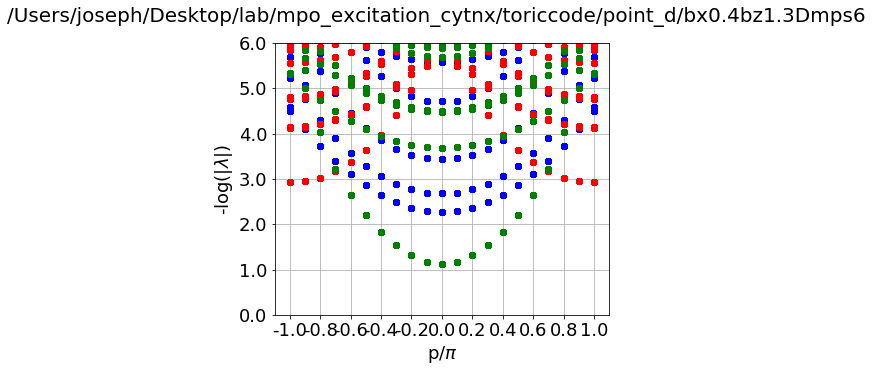

In [14]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['o']; 
clist = ["b","r","g"]
linewidth = 0
markersize = 6
num_p = 11

# filename = "bz0.5_bx0.4"
filename = "/Users/joseph/Desktop/lab/mpo_excitation_cytnx/toriccode/point_d/bx0.4bz1.3Dmps6"

data_triv_Ceq = np.loadtxt(filename + "_II.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
fig, ax1 = plt.subplots(figsize = (6,5))

for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,'bo',ms = markersize)

data_triv_Ceq = np.loadtxt(filename + "_IZ.txt")
p1 = 1.-np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,'ro', ms = markersize)

data_triv_Ceq = np.loadtxt(filename + "_ZZ.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq 
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,'go', ms = markersize)
    
# ax.set_xlim(0,1)
fig.suptitle(filename, fontsize = 20)
ax1.set_ylim(0,6)
ax1.set_xlabel('p/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
ax1.set_yticklabels(ax1.get_yticks(),fontdict={'size':18})
ax1.set_xticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_xticklabels(ax1.get_xticks(),fontdict={'size':18})

ax1.grid()
plt.savefig(filename+".pdf")
plt.show()

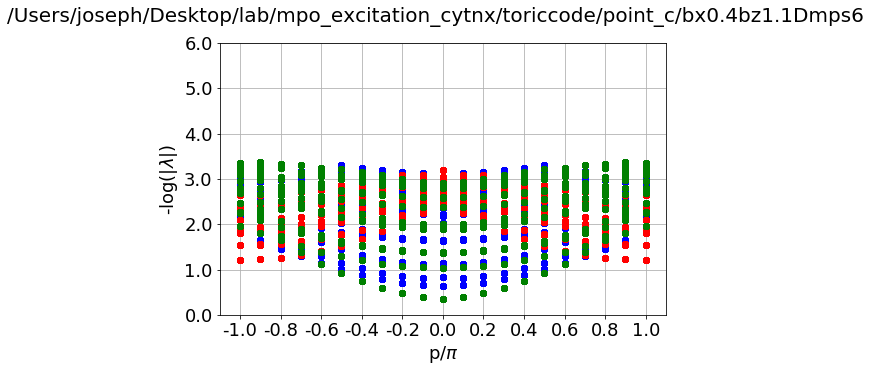

In [15]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['o']; 
clist = ["b","r","g"]
linewidth = 0
markersize = 6
num_p = 11

# filename = "bz0.5_bx0.4"
filename = "/Users/joseph/Desktop/lab/mpo_excitation_cytnx/toriccode/point_c/bx0.4bz1.1Dmps6"

data_triv_Ceq = np.loadtxt(filename + "_II.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log10(abs(w1))
fig, ax1 = plt.subplots(figsize = (8,5))

for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,'bo',ms = markersize)

data_triv_Ceq = np.loadtxt(filename + "_IZ.txt")
p1 = 1.-np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log10(abs(w1))
for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,'ro', ms = markersize)

data_triv_Ceq = np.loadtxt(filename + "_ZZ.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_triv_Ceq 
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log10(abs(w1))
for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,'go', ms = markersize)
    
# ax.set_xlim(0,1)
fig.suptitle(filename, fontsize = 20)
ax1.set_ylim(0,6)
ax1.set_xlabel('p/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
ax1.set_yticklabels(ax1.get_yticks(),fontdict={'size':18})
ax1.set_xticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_xticklabels(ax1.get_xticks(),fontdict={'size':18})

ax1.grid()
plt.savefig(filename+".pdf")
plt.show()

/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/point_g/bx1.0bz0.5Dmps6_Cee.txt


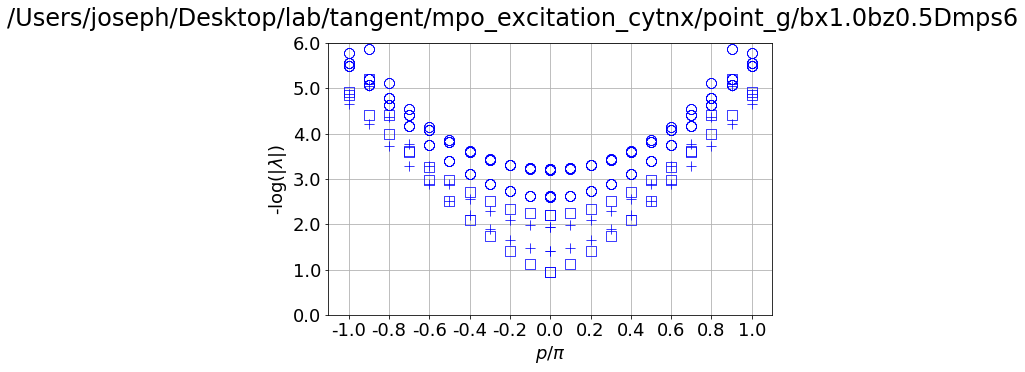

In [88]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['+','o','s']; 
clist = ["b"]
linewidth = 0
markersize = 10
num_p = 11

filename = "/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/point_g/bx1.0bz0.5Dmps6"

print(filename + "_Cee.txt")
data_Cee = np.loadtxt(filename + "_Cee.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_Cee
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
fig, ax1 = plt.subplots(figsize = (8,5))

fig.suptitle(filename, fontsize = 24)

for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[0],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)
    
data_Ceo = np.loadtxt(filename + "_Ceo.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_Ceo
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[1],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)

data_Coo = np.loadtxt(filename + "_Coo.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_Coo
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[1]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[2],mec= clist[0], 
             mfc= 'none', mew = .5, ms = markersize)

# ax.set_xlim(0,1)
ax1.set_ylim(0,6)
ax1.set_xlabel('$p$/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
# ax1.set_title(filename , fontdict={'family' : 'Times New Roman', 'size':24})
ax1.set_yticklabels(ax1.get_yticks(),fontdict={'size':18})
ax1.set_xticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_xticklabels(ax1.get_xticks(),fontdict={'size':18})

plt.subplots_adjust(left = 0.18,right = 0.95)

ax1.grid()
plt.savefig(filename+".pdf")
plt.show()




/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/point_h/bx1.3bz0.5Dmps6_Cee.txt


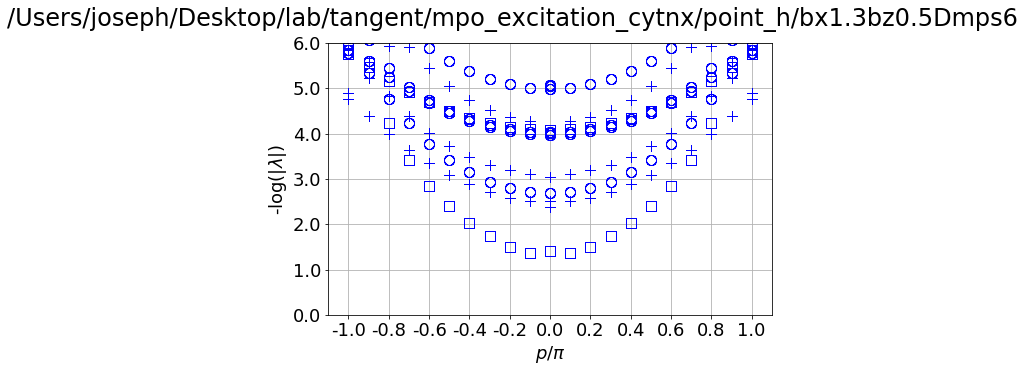

In [87]:
import matplotlib.pyplot as plt
import numpy as np

makerlist =['+','o','s']; 
clist = ["b"]
linewidth = 0
markersize = 10
num_p = 11

filename = "/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/point_h/bx1.3bz0.5Dmps6"

print(filename + "_Cee.txt")
data_Cee = np.loadtxt(filename + "_Cee.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_Cee
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
fig, ax1 = plt.subplots(figsize = (8,5))

fig.suptitle(filename, fontsize = 24)

for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[0],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)
    
data_Ceo = np.loadtxt(filename + "_Ceo.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_Ceo
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[1],mec= clist[0], 
                  mfc= 'none', mew = .5, ms = markersize)

data_Coo = np.loadtxt(filename + "_Coo.txt")
p1 = np.linspace(0, 1.0, 11)
p1 = np.concatenate((-np.flip(p1), p1), axis=0)
w1 = data_Coo
w1 = np.concatenate((np.flip(w1), w1), axis=0)
lnw1 = np.log(abs(w1))
for i in range(lnw1.shape[0]):
    ax1.plot(p1,-lnw1,c = clist[0],ls= '--', lw= linewidth,marker = makerlist[2],mec= clist[0], 
             mfc= 'none', mew = .5, ms = markersize)

# ax.set_xlim(0,1)
ax1.set_ylim(0,6)
ax1.set_xlabel('$p$/$\pi$', fontdict={'size':18})
ax1.set_ylabel('-log(|$\lambda$|)',fontdict={'size':18})
# ax1.set_title(filename , fontdict={'family' : 'Times New Roman', 'size':24})
ax1.set_yticklabels(ax1.get_yticks(),fontdict={'size':18})
ax1.set_xticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_xticklabels(ax1.get_xticks(),fontdict={'size':18})

plt.subplots_adjust(left = 0.18,right = 0.95)

ax1.grid()
plt.savefig(filename+".pdf")
plt.show()





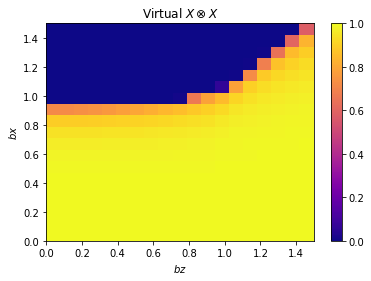

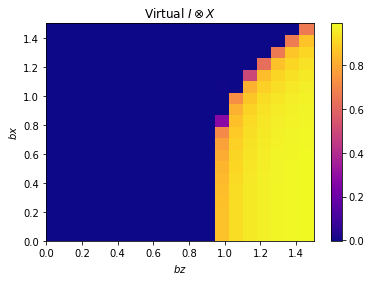

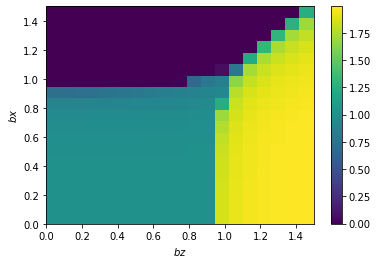

In [86]:
import numpy as np
# from numpy import linalg as LA
# from scipy.sparse.linalg import LinearOperator, eigs
import matplotlib.pyplot as plt
# from ncon import ncon

xx = np.load("/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/expXXs.npy", allow_pickle = True)
ix = np.load("/Users/joseph/Desktop/lab/tangent/mpo_excitation_cytnx/expIXs.npy", allow_pickle = True)
bxs = np.linspace(0, 1.5, 20)
bzs = np.linspace(0, 1.5, 20)

plt.title("Virtual $X  \otimes X $")
plt.pcolormesh(bzs, bxs, xx, cmap="plasma")
# plt.pcolormesh(bzs, bxs, xx, cmap="plasma")
plt.colorbar()
plt.ylabel('$bx$')
plt.xlabel('$bz$')
plt.show()

plt.title("Virtual $I  \otimes X $")
plt.pcolormesh(bzs, bxs, ix, cmap="plasma")
# plt.pcolormesh(bzs, bxs, ix, cmap="plasma")
plt.colorbar()
plt.ylabel('$bx$')
plt.xlabel('$bz$')
plt.show()

mix = ix+xx
# plt.title("Virtual $I  \otimes X $")
plt.pcolormesh(bzs, bxs, mix)
# plt.pcolormesh(bzs, bxs, ix, cmap="plasma")
plt.colorbar()
plt.ylabel('$bx$')
plt.xlabel('$bz$')
plt.show()

In [6]:
L= 100 
Ｍ  = 0
for i in range(-L, L+1):
    for j in range(-L, L+1):
        for k in range(-L, L+1):
            if i is j and j is k and k is 0 :
                pass
            r=(i**2+j**2+k**2)**(-0.5)
            if (i+j+k)%2==0:
                M = M+r
            else: 
                Ｍ = Ｍ-r
print(Ｍ)
# n = 100 will be 1.7475645950377314

ZeroDivisionError: 0.0 cannot be raised to a negative power